# What are the most demanded skills for the top 3 most popular data roles?

### methodology
1. Clean-up sklill column
2. Calculate skill count based on ```job_title_short```
3. Calculate skill percentage
4. Plotting final findings

In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\vikra\Desktop\Data analyst Luke\python\3_project\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
df_India = df[df['job_country']=='India']

In [11]:
df_skills = df_India.explode(column='job_skills')
df_skills[['job_title','job_skills']]

,job_title,job_skills
16,Big Data Engineer,powershell
16,Big Data Engineer,python
16,Big Data Engineer,sql
16,Big Data Engineer,mysql
16,Big Data Engineer,sql server
...,...,...
785716,Application Support Analyst,c#
785716,Application Support Analyst,sql
785718,Senior Performance QA Analyst,None
785740,AWS System Analyst,aws


In [17]:
df_skills_count = df_skills.groupby(by=['job_skills','job_title_short']).size() # grouping by job_skills and job_title_short column and apply size function for counting how many times appeared the skill
df_skills_count = df_skills_count.reset_index(name='skill_count') # helps in converting in dataframe
df_skills_count.sort_values(by='skill_count', ascending=False,inplace=True) #sort values by skill count in descending

In [24]:
#getting top 3 job titles
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3]) #slicing top 3 job titles and sorting alphabetically
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

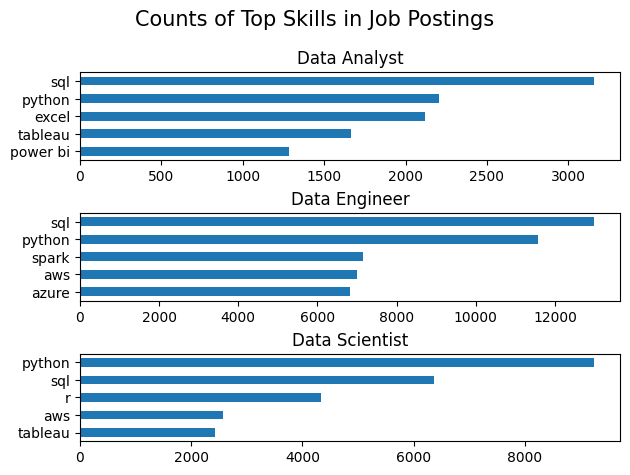

In [32]:
fig, ax = plt.subplots(len(job_titles),1)
for i,job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x = 'job_skills', y = 'skill_count', ax = ax[i] , title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in Job Postings',fontsize=15)
plt.tight_layout(h_pad=0.5)  #fixes the overlap
plt.show()

In [36]:
df_job_title_count = df_India['job_title_short'].value_counts().reset_index(name='jobs_total')

In [43]:
df_skill_perc = pd.merge(df_skills_count,df_job_title_count,how='left',on='job_title_short')
df_skill_perc['skill_percent'] = 100*df_skill_perc['skill_count']/df_skill_perc['jobs_total']
df_skill_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,sql,Data Engineer,12993,19062,68.161788
1,python,Data Engineer,11568,19062,60.686182
2,python,Data Scientist,9248,13279,69.643798
3,spark,Data Engineer,7157,19062,37.545903
4,aws,Data Engineer,6993,19062,36.685552
...,...,...,...,...,...
1684,angular.js,Data Scientist,1,13279,0.007531
1685,arch,Business Analyst,1,1887,0.052994
1686,mlpack,Data Engineer,1,19062,0.005246
1687,yarn,Senior Data Scientist,1,2486,0.040225


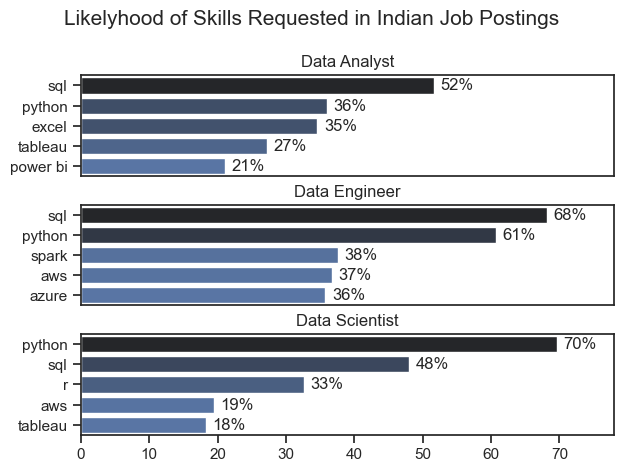

In [70]:
fig, ax = plt.subplots(len(job_titles),1)
sns.set_theme(style='ticks')
for i,job_title in enumerate(job_titles):
    df_plot = df_skill_perc[df_skill_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot,x='skill_percent',y='job_skills', ax=ax[i],hue='skill_count',palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].invert_yaxis()
    ax[i].set_xlabel('')
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,78)

    for n,v in enumerate(df_plot['skill_percent']):
        ax[i].text(v+1,n,f'{v:.0f}%', va='center')

    if i != len(job_titles)-1:
        ax[i].set_xticks([])

fig.suptitle('Likelyhood of Skills Requested in Indian Job Postings',fontsize=15)
plt.tight_layout(h_pad=0.5)  #fixes the overlap
plt.show()